In [1]:
import os
import numpy as np
import pandas as pd
from math import sqrt

# Visualization
from pylab import *
import matplotlib.mlab as mlab

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Read in csv of Toy Dataset
df = pd.read_csv('toy_dataset.csv')
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


# Basic Exploratory Data Analysis and Data Cleaning

## Check shape 

In [2]:
df.shape

(150000, 6)

## Check if missing values (null) are present 

In [3]:
df.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

## Check for basic information of our dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


## Check if NA values are present in dataframe

In [5]:
print(df.isna())

        Number   City  Gender    Age  Income  Illness
0        False  False   False  False   False    False
1        False  False   False  False   False    False
2        False  False   False  False   False    False
3        False  False   False  False   False    False
4        False  False   False  False   False    False
...        ...    ...     ...    ...     ...      ...
149995   False  False   False  False   False    False
149996   False  False   False  False   False    False
149997   False  False   False  False   False    False
149998   False  False   False  False   False    False
149999   False  False   False  False   False    False

[150000 rows x 6 columns]


## Removing trailing and ending spaces if present


In [6]:
# We can remove any ussless whitespaces if present for example:
df['City'].str.strip()
df['Gender'].str.strip()
df['Illness'].str.strip()

0         No
1         No
2         No
3         No
4         No
          ..
149995    No
149996    No
149997    No
149998    No
149999    No
Name: Illness, Length: 150000, dtype: object

## Check for duplicates in dataframe

In [7]:
duplicate_rows = df.duplicated()
print(duplicate_rows)
# No duplicates found to remove then we would do: df.drop_duplicates(inplace=True)

0         False
1         False
2         False
3         False
4         False
          ...  
149995    False
149996    False
149997    False
149998    False
149999    False
Length: 150000, dtype: bool


## Check if there is no negative Age and Income values in dataframe

In [8]:
negative_ages = (df['Age'] < 0).any()

if negative_ages:
    print("There are negative ages in the 'Age' column.")
else:
    print("There are no negative ages in the 'Age' column.")

There are no negative ages in the 'Age' column.


In [9]:
negative_incomes = (df['Income'] < 0).any()

if negative_incomes:
    print("There are negative incomes in the 'Income' column.")
else:
    print("There are no negative incomes in the 'Income' column.")

There are negative incomes in the 'Income' column.


In [10]:
df = df[df['Income'] >= 0]

In [11]:
df.reset_index(drop=True, inplace=True)

## Check now basic statistic data of our dataframe

In [12]:
# Basic data description
df.describe()

,Number,Age,Income
count,149999.000000,149999.000000,149999.000000
mean,75000.998367,44.950233,91253.410989
std,43301.128676,11.572517,24988.457482
min,1.000000,25.000000,584.000000
25%,37501.500000,35.000000,80868.000000
50%,75001.000000,45.000000,93655.000000
75%,112500.500000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


In [13]:
# Confirming via Numpy
mean_income_numpy = np.mean(df['Income'])
mean_age_numpy = np.mean(df['Age'])

print("Mean Income using NumPy {:.3f}".format(mean_income_numpy))
print("Mean Age using NumPy {:.3f}".format(mean_age_numpy))

Mean Income using NumPy 91253.411
Mean Age using NumPy 44.950


## Checking distributions

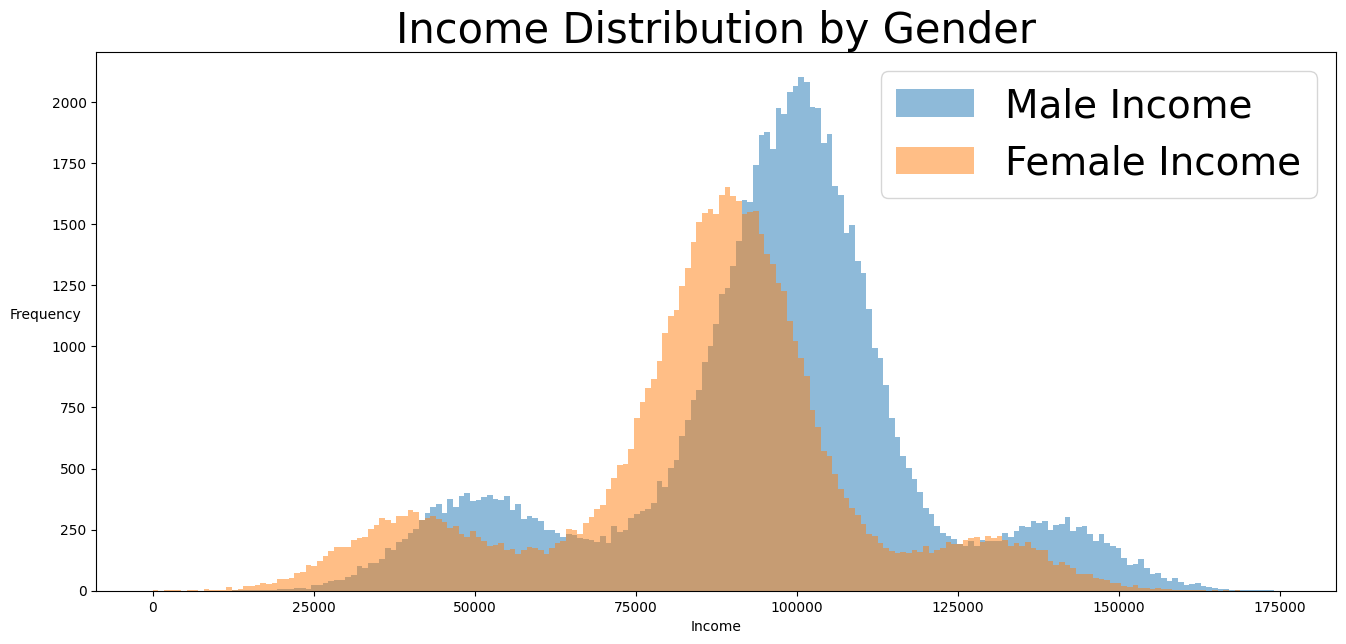

In [14]:
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

x = pd.Series(male_df['Income'])
y = pd.Series(female_df['Income'])

plt.figure(figsize=(16,7))

bins = np.linspace(0, 175000, 200)

plt.hist(x, bins, alpha=0.5, label='Male Income')
plt.hist(y, bins, alpha=0.5, label='Female Income')
plt.legend(loc='upper right', prop={'size' : 28})
plt.xlabel('Income')
plt.ylabel('Frequency', rotation=0)
plt.rc('axes', labelsize=10) 
plt.rc('axes', titlesize=30) 
plt.title('Income Distribution by Gender')


plt.show()

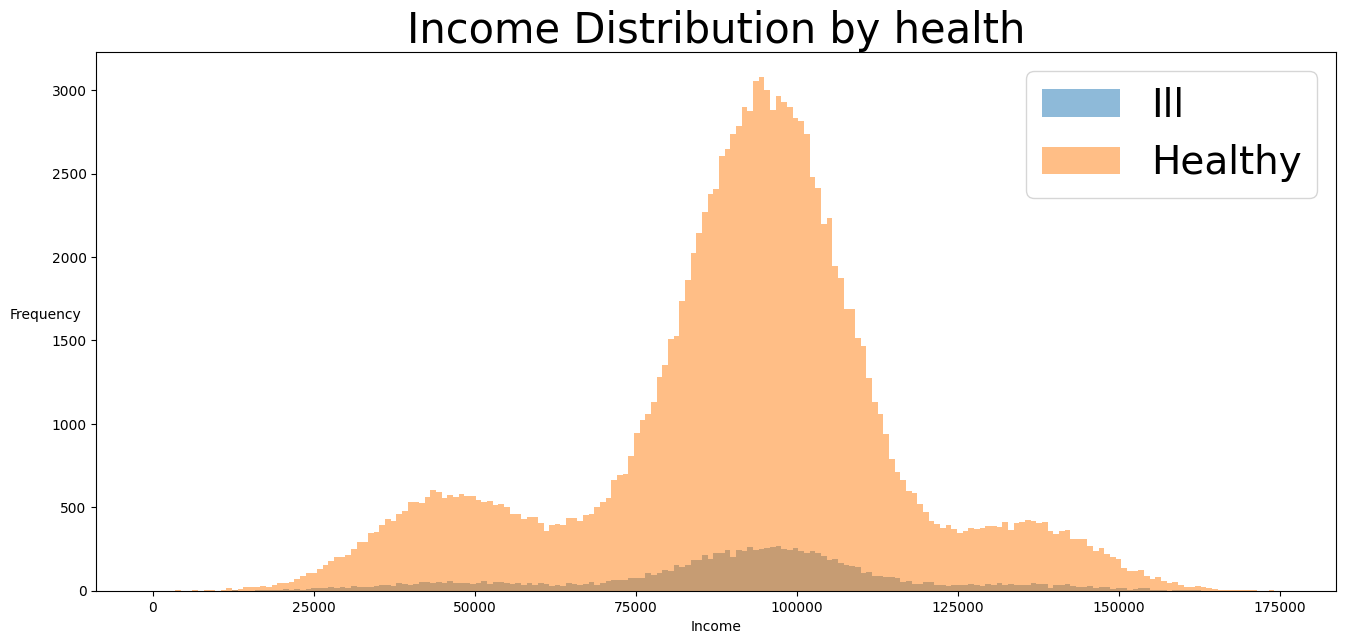

In [15]:
# EDA - healthy vs. ill income distribution
ill = df[df['Illness'] == 'Yes']
healthy = df[df['Illness'] == 'No']

x = pd.Series(ill['Income'])
y = pd.Series(healthy['Income'])

plt.figure(figsize=(16,7))

bins = np.linspace(0, 175000, 200)

plt.hist(x, bins, alpha=0.5, label='Ill')
plt.hist(y, bins, alpha=0.5, label='Healthy')
plt.legend(loc='upper right', prop={'size' : 28})
plt.xlabel('Income')
plt.ylabel('Frequency', rotation=0)
plt.rc('axes', labelsize=10) 
plt.rc('axes', titlesize=30) 
plt.title('Income Distribution by health')


plt.show()

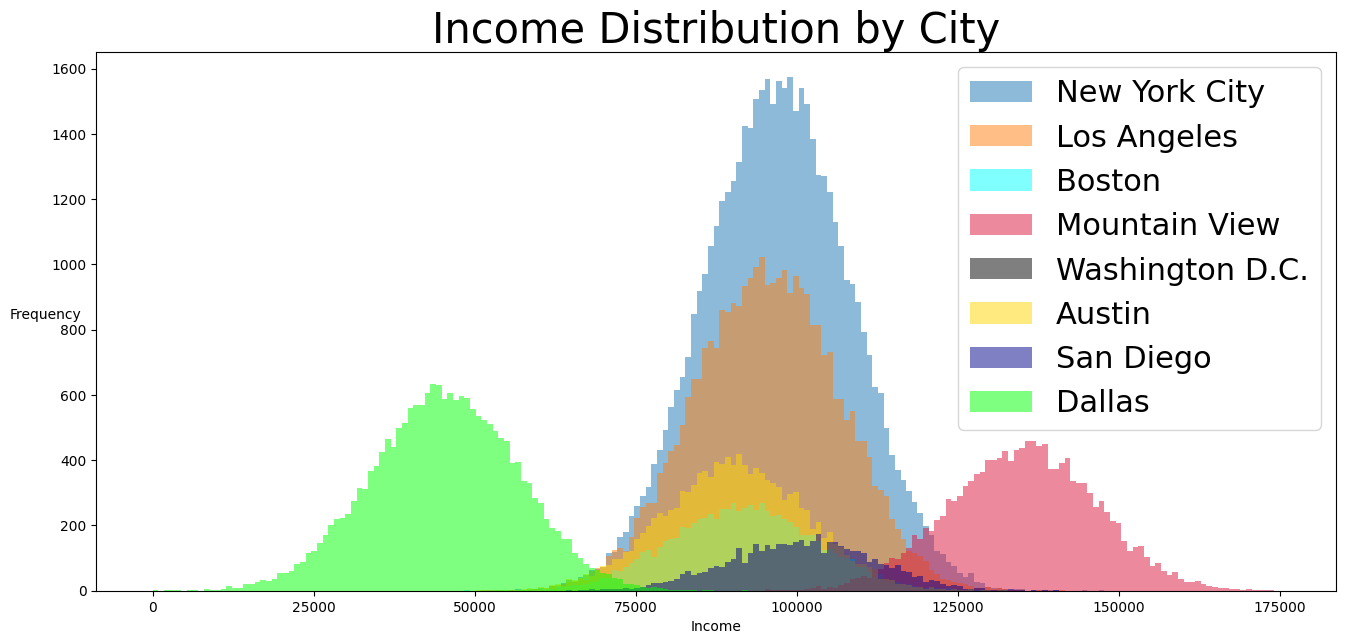

In [16]:
new_df = df[df['City'] == 'New York City']
los_df = df[df['City'] == 'Los Angeles']
bos_df = df[df['City'] == 'Boston']
moun_df = df[df['City'] == 'Mountain View']
wash_df = df[df['City'] == 'Washington']
aus_df = df[df['City'] == 'Austin']
san_df = df[df['City'] == 'San Diego']
dal_df = df[df['City'] == 'Dallas']

a = pd.Series(new_df['Income'])
b = pd.Series(los_df['Income'])
c = pd.Series(bos_df['Income'])
d = pd.Series(moun_df['Income'])
e = pd.Series(wash_df['Income'])
f = pd.Series(aus_df['Income'])
g = pd.Series(san_df['Income'])
h = pd.Series(dal_df['Income'])

plt.figure(figsize=(16,7))

bins = np.linspace(0, 175000, 200)

plt.hist(a, bins, alpha=0.5, label='New York City')
plt.hist(b, bins, alpha=0.5, label='Los Angeles')
plt.hist(c, bins, alpha=0.5, label='Boston', color='cyan')
plt.hist(d, bins, alpha=0.5, label='Mountain View', color='crimson')
plt.hist(e, bins, alpha=0.5, label='Washington D.C.', color='Black')
plt.hist(f, bins, alpha=0.5, label='Austin', color='Gold')
plt.hist(g, bins, alpha=0.5, label='San Diego', color='DarkBlue')
plt.hist(h, bins, alpha=0.5, label='Dallas', color='Lime')
plt.legend(loc='upper right', prop={'size' : 22})
plt.xlabel('Income')
plt.ylabel('Frequency', rotation=0)
plt.rc('axes', labelsize=10) 
plt.rc('axes', titlesize=30) 
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20) 
plt.title('Income Distribution by City')

plt.show()

<Axes: title={'center': 'City Counts'}, ylabel='City'>

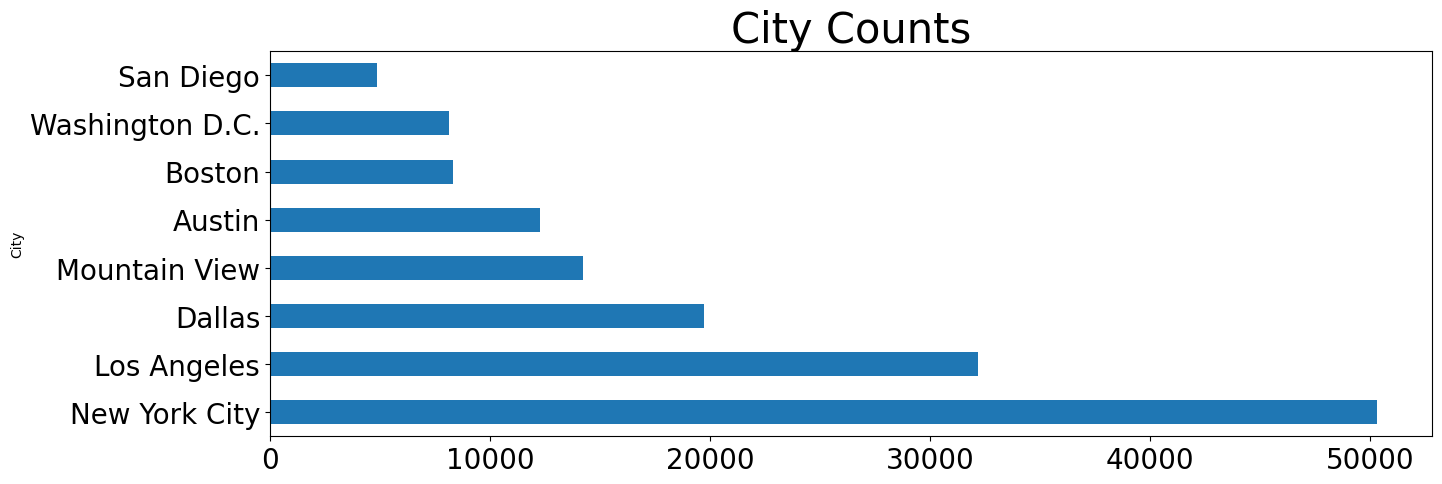

In [17]:
# df['City'].value_counts() returns the counts of each city
df['City'].value_counts().plot(kind='barh', 
                               rot=0, 
                               title='City Counts', 
                               figsize=(15,5))

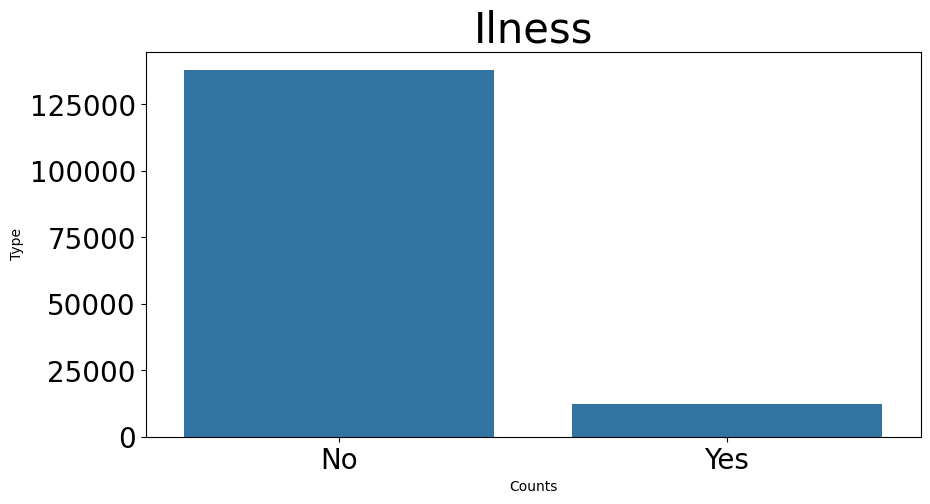

In [18]:
rcParams['figure.figsize'] = 10,5
sns.barplot(x = df['Illness'].value_counts().index, y = df['Illness'].value_counts().values)
plt.title('Ilness')
plt.xlabel('Counts')
plt.ylabel('Type')
plt.show()

## Scaling (normalizing) numerical data - it is often done in ML because during training it is easier for model to converge to global optima of our cost function

In [19]:
scaler = MinMaxScaler()
columns_to_scale = ['Age', 'Income']
scaled_values = scaler.fit_transform(df[columns_to_scale])

# Create a DataFrame with the scaled values
scaled_df = pd.DataFrame(scaled_values, columns=['scaled_age', 'scaled_income'])

# Append scaled values to the original DataFrame

print(scaled_df)

        scaled_age  scaled_income
0            0.400       0.225306
1            0.725       0.252020
2            0.425       0.293924
3            0.375       0.228557
4            0.525       0.281498
...            ...            ...
149994       0.575       0.527176
149995       0.000       0.544613
149996       0.025       0.630340
149997       0.000       0.630300
149998       0.300       0.490828

[149999 rows x 2 columns]


In [20]:
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


# Hypothesis testing


# Interpretation

If we use a significance level equal to 0.05 then if p is less than that level we reject the null hypothesis. This means that at this significance level, there is a difference in income between males and females.

<center><img src="img\hypothesis.png" alt="Hypothesis graph" width="600"></center>

H0: Null hypothesis: the average mean salary of males is equal to the average mean salary of females.

Ha: Alternative hypothesis: the average mean salary ofs is higher than the average mean salary of females.

For this task two-sample task t test is suitable - compare two independent variables and observe whether there is any significant difference between two variables

In [21]:
df_male = df[
    (df['Gender'] == 'Male') & 
    (df['Income'].notnull())
].sample(n=500)[['Number', 'Gender','Income']]

df_female = df[
    (df['Gender'] == 'Female') & 
    (df['Income'].notnull())
].sample(n=500)[['Number', 'Gender','Income']]
display(df_male.head())
display(df_female.head())

,Number,Gender,Income
146294,146296,Male,94776.0
115085,115087,Male,150919.0
110798,110800,Male,139142.0
102727,102729,Male,124226.0
704,706,Male,52407.0


,Number,Gender,Income
126552,126554,Female,52252.0
83730,83732,Female,91428.0
55402,55404,Female,95222.0
127067,127069,Female,77344.0
98103,98105,Female,88644.0


In [22]:
from scipy.stats import ttest_ind

test_statistic, p_value = ttest_ind(df_male['Income'], df_female['Income'], alternative='greater')

print(p_value)

if p_value < 0.05:
    print("\nWe Reject Null Hypothesis")
else:
    print("\nWe Accept Alternate Hypothesis")

6.971926578073846e-08

We Reject Null Hypothesis


Data provides very strong evidence that the mean salary of males is higher than the mean salary of females. Hence, we reject the null hypothesis.

# Dimensinality reduction PCA

Describing data by its mean and covariance matrix, two eigenvectors perpendicular to each other. The idea is that we can reperesent data with just one vector reducing the dimensinality of problem

In [23]:
print(df.isnull().sum())

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64


In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
df_pca_analysis = df.copy()

# Scale numerical variables
scaler = StandardScaler()
numerical_cols = ['Age', 'Income']
df_pca_analysis[numerical_cols] = scaler.fit_transform(df_pca_analysis[numerical_cols])

# Encode categorical variables
label_encoder = LabelEncoder()
df_pca_analysis['City'] = label_encoder.fit_transform(df['City'])
df_pca_analysis['Gender'] = label_encoder.fit_transform(df['Gender'])
df_pca_analysis['Illness'] = label_encoder.fit_transform(df['Illness'])

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_pca_analysis.drop(columns=['Number']))

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate the principal components DataFrame with the original DataFrame
result_df = pd.concat([df[['Number', 'City', 'Gender', 'Illness']], pca_df], axis=1)

print(result_df)

        Number    City  Gender Illness       PC1       PC2
0            1  Dallas    Male      No  1.920895 -0.308508
1            2  Dallas    Male      No  1.888488  0.810705
2            3  Dallas    Male      No  1.836038 -0.232081
3            4  Dallas    Male      No  1.916823 -0.395372
4            5  Dallas    Male      No  1.851613  0.115291
...        ...     ...     ...     ...       ...       ...
149994  149996  Austin    Male      No  3.516770  0.243849
149995  149997  Austin    Male      No  3.494045 -1.745693
149996  149998  Austin    Male      No  3.388017 -1.671751
149997  149999  Austin    Male      No  3.388016 -1.758137
149998  150000  Austin  Female      No  3.567277 -0.696090

[149999 rows x 6 columns]


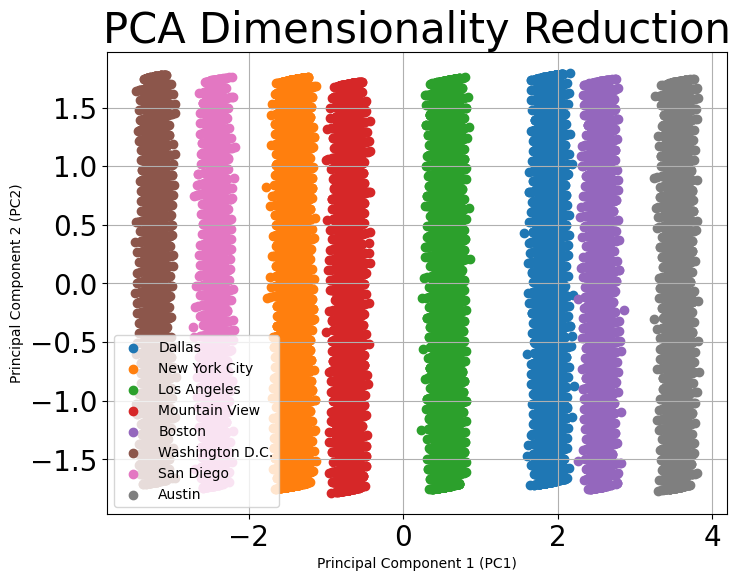

In [25]:
import matplotlib.pyplot as plt

# Create a dictionary to map city names to names 
city_names = {'New York City': 'New York City', 
              'Los Angeles': 'Los Angeles', 
              'Boston': 'Boston', 
              'Mountain View': 'Mountain View',
              'Washington': 'Washington', 
              'Austin': 'Austin', 
              'San Diego': 'San Diego', 
              'Dallas': 'Dallas'}

# Scatter plot of the principal components with color based on cities
plt.figure(figsize=(8, 6))
for city_name in result_df['City'].unique():
    city_data = result_df[result_df['City'] == city_name]
    plt.scatter(city_data['PC1'], city_data['PC2'], label=city_name)

plt.title('PCA Dimensionality Reduction')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.grid(True)
plt.show()


# Linear regression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataframe

df_linear = df.copy()

# Perform one-hot encoding for categorical variables
df_linear = pd.get_dummies(df_linear, columns=['City', 'Illness'])

# Convert gender to numerical values (if needed)
df_linear['Gender'] = df_linear['Gender'].map({'Male': 1, 'Female': 0})

# Split data into features and target variable
X = df_linear.drop('Gender', axis=1)
y = df_linear['Gender']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Training R^2 score:", train_score)
print("Testing R^2 score:", test_score)


Training R^2 score: 0.19549155897901105
Testing R^2 score: 0.20372382588828286


As expected linear regression is pretty bad for predicting categorical variable. Linear regression is more suited for continuous target variables

# Logistic regression

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
# Do one-got enconding on categorical variables through sklearn transformer
df_logistic = df.copy()
categorical_cols = ['City', 'Illness']
numerical_cols = [col for col in df_logistic.columns if col not in ['City', 'Illness', 'Gender']]  # 'Gender' is the target variable
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols),
                  ('num', StandardScaler(), numerical_cols)],
    remainder='passthrough'
)

# Define the logistic regression model
model = LogisticRegression(max_iter=1000)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Split data into features and target variable
X = df_logistic.drop('Gender', axis=1)
y = df_logistic['Gender']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate the model
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print("Training accuracy:", train_score)
print("Testing accuracy:", test_score)

Training accuracy: 0.6949891249093743
Testing accuracy: 0.6986666666666667


As expected logistic regression is a lot better for this problem